##Question 1:

To start with, we'll need to compute the number of rentals per station per day. Use pandas to do that.


In [44]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import datetime
from pandas import DataFrame

In [2]:
stations = pd.read_table('stations.tsv')

In [3]:
usage = pd.read_table('usage_2012.tsv')

In [4]:
usage['time_start'] = pd.to_datetime(usage['time_start'])

In [5]:
usage_per_day = usage.set_index('time_start').groupby(pd.TimeGrouper('D')).size()

In [6]:
usage_per_station = usage[['station_start']].groupby('station_start').size()

In [9]:
usage_per_station_per_day = usage.groupby(['date', 'station_start']).size()

In [7]:
def to_date(x):
    return str(x.month) + '/' + str(x.day) + '/' + str(x.year)

In [8]:
usage['date'] = usage['time_start'].apply(to_date)

In [10]:
usage_per_station_per_day = usage.groupby(['date', 'station_start']).size()

In [38]:
usage_per_station_per_day

date      station_start                                   
1/1/2012  10th & Monroe St NE                                  10
          10th & U St NW                                       58
          10th St & Constitution Ave NW                        54
          11th & H St NE                                       20
          11th & Kenyon St NW                                  58
          12th & Army Navy Dr                                  12
          12th & Newton St NE                                   2
          13th & D St NE                                       46
          13th & H St NE                                       50
          13th St & New York Ave NW                            10
          14th & D St NW / Ronald Reagan Building              26
          14th & D St SE                                       32
          14th & G St NW                                       16
          14th & Harvard St NW                                 80
          14th & 

we have grouped our data by day then station and the size gives us the users in that day

2a. Our stations data has a huge number of quantitative attributes: fast_food, parking, restaurant, etc... Some of them are encoded as 0 or 1 (for absence or presence), others represent counts. To start with, run a simple linear regression where the input (x) variables are all the various station attributes and the output (y) variable is the average number of rentals per day.

In [11]:
rentals_per_station = usage[['station_start']].groupby('station_start').size()

In [12]:
def get_average(x):
    return x/366
daily_rentals = rentals_per_station.apply(get_average)

In [16]:
daily_rentals.head()

station_start
10th & E St NW                   17
10th & Monroe St NE              10
10th & U St NW                   71
10th St & Constitution Ave NW    55
11th & H St NE                   35
dtype: int64

In [13]:
from sklearn.linear_model import LinearRegression

In [17]:
c = DataFrame(daily_rentals.index, columns=['station'])

In [18]:
c['daily_rentals'] = daily_rentals.values

In [19]:
c['station'] = daily_rentals.index

In [22]:
merged = pd.merge(left=c, right=stations, left_on='station', right_on='station')

In [28]:
x = merged[list(merged.columns.values[8:])]

In [37]:
y = merged[list(merged.columns.values[1:2])]

In [39]:
model = LinearRegression()

In [40]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
import matplotlib.pyplot as plt

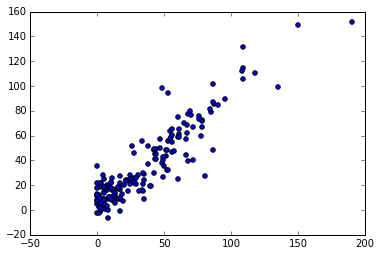

In [47]:
plt.scatter(y, model.predict(x))

ta da!  'simple' linear regression

###2b.  plot the predicted values against the acutal values and see how they compare
look up!

In [48]:
model.coef_

array([[  2.78448805e+00,  -8.96284685e-01,   3.48332241e-01,
         -5.89647316e+01,  -2.93308376e+00,  -4.89615252e+00,
          5.76436592e+00,   1.98359974e+00,   2.14006736e-01,
         -1.18564343e+14,   1.36896677e+00,   4.89682200e+01,
          5.62813575e+00,   1.99629608e+14,   3.64237392e+13,
          5.95495618e+00,   6.22769769e+13,   6.72915022e+00,
          1.44982096e+01,  -2.57161962e+00,   3.35509042e+00,
         -4.44925024e+01,   2.37309802e+01,  -4.33059372e+01,
         -1.26353387e+01,   6.20839429e+13,  -1.91838154e+00,
          4.21211901e+00,  -2.71115165e+00,   7.15213527e+00,
         -6.20839429e+13,   3.85175337e+00,   1.32855030e+00,
          1.04971899e+01,   4.53976633e+00,   1.79872593e+00,
         -3.71879898e+01,  -1.72464217e+01,   4.31224818e+00,
         -3.03236952e+00,   1.01498357e+01,   4.82067870e-01,
          1.48624297e+02,  -7.81908566e+00,  -1.16338957e+01,
          1.80819476e+02,  -1.49949384e+00,   1.76919576e+00,
        

###2c.  look at the model coefficients and see whether anything is odd
we think it's odd that some of these numbers are very large and some are very small

###2d.  go back and split the data between a training set and a test set

In [50]:
from sklearn.linear_model import Lasso

In [61]:
model = Lasso(alpha=0.15)

In [62]:
model.fit(x,y)

Lasso(alpha=0.15, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
model.coef_

array([  6.61461340e-01,  -3.07529467e+00,   4.91492864e-01,
        -0.00000000e+00,   1.19251103e+00,  -6.74593614e+00,
         5.31695804e+00,   9.07040711e+00,   6.77311058e-01,
         0.00000000e+00,   2.35627882e+00,   1.91640425e+01,
        -1.61684392e+00,   0.00000000e+00,   0.00000000e+00,
         5.34980650e+00,   0.00000000e+00,  -5.48383752e+00,
        -0.00000000e+00,  -2.67475242e+00,   1.81659678e+00,
        -0.00000000e+00,   1.57554968e+01,  -5.92180122e+00,
        -1.06187310e-01,  -4.48887835e-01,  -0.00000000e+00,
         2.68475458e+00,   0.00000000e+00,   4.04994833e+00,
        -7.53207329e+00,   0.00000000e+00,   0.00000000e+00,
         5.77559208e+00,   3.92222545e+00,  -3.95302518e+00,
        -2.60947446e+00,  -8.82210694e-01,  -0.00000000e+00,
         9.28154062e-02,   3.27211133e+00,   0.00000000e+00,
         8.67622398e+00,   9.75932547e-01,  -6.36433046e+00,
         4.75622297e+01,   0.00000000e+00,   0.00000000e+00,
        -1.21187664e+00,

In [64]:
from sklearn.cross_validation import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.50, random_state=42)

In [73]:
model = LinearRegression()

In [74]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

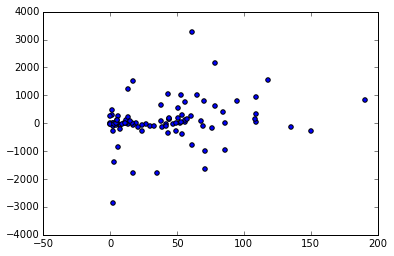

In [77]:
plt.scatter(y_test, model.predict(x_test))

In [78]:
model = Lasso()

In [ ]:
model.fit(x_train,)